In [30]:
import numpy
import pandas
import random
import seaborn
import matplotlib.pyplot as plot
%matplotlib inline
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [31]:
# Load data sets and combine them
train_data_frame = pandas.read_csv('train.csv')
test_data_frame = pandas.read_csv('test.csv')
combined_data_frame = [train_data_frame, test_data_frame]

In [32]:
# Preview Train data frame
train_data_frame.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
# Preview Test data frame
test_data_frame.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [34]:
# Get some numerical insights from the Train data frame (mean, std, max, min, freq, etc.)
train_data_frame.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [35]:
# Get some categorical insights from the Train data frame (count, uniqueness, freq, etc.)
train_data_frame.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Daly, Mr. Eugene Patrick",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


In [36]:
# Get some numerical insights from the Train data frame (mean, std, max, min, freq, etc.)
test_data_frame.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [37]:
# Get some categorical insights from the Train data frame (count, uniqueness, freq, etc.)
test_data_frame.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Shaughnessy, Mr. Patrick",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [38]:
# Analyze correlation between Class and Survival
class_grouping = train_data_frame[['Pclass', 'Survived']] \
    .groupby(['Pclass'], as_index=False) \
    .mean() \
    .sort_values(by='Survived', ascending=True)

class_grouping

,Pclass,Survived
2,3,0.242363
1,2,0.472826
0,1,0.629630


In [39]:
# Analyze correlation between Sex and Survival
sex_grouping = train_data_frame[['Sex', 'Survived']] \
    .groupby(['Sex'], as_index=False) \
    .mean() \
    .sort_values(by='Survived', ascending=True)

sex_grouping

,Sex,Survived
1,male,0.188908
0,female,0.742038


In [40]:
# Analyze correlation between the number of Siblings/Spouses and Survival
siblings_spouses_grouping = train_data_frame[['SibSp', 'Survived']] \
    .groupby(['SibSp'], as_index=False) \
    .mean() \
    .sort_values(by='Survived', ascending=True)

siblings_spouses_grouping

,SibSp,Survived
5,5,0.000000
6,8,0.000000
4,4,0.166667
3,3,0.250000
0,0,0.345395
2,2,0.464286
1,1,0.535885


In [41]:
# Analyze correlation between the number of Parents/Children and Survival
parents_children_grouping = train_data_frame[['Parch', 'Survived']] \
    .groupby(['Parch'], as_index=False) \
    .mean() \
    .sort_values(by='Survived', ascending=True)

parents_children_grouping

,Parch,Survived
4,4,0.000000
6,6,0.000000
5,5,0.200000
0,0,0.343658
2,2,0.500000
1,1,0.550847
3,3,0.600000


In [42]:
# Analyze correlation between Embark and Survival
embarked_grouping = train_data_frame[['Embarked', 'Survived']] \
    .groupby(['Embarked'], as_index=False) \
    .mean() \
    .sort_values(by='Survived', ascending=True)

embarked_grouping

,Embarked,Survived
2,S,0.336957
1,Q,0.389610
0,C,0.553571


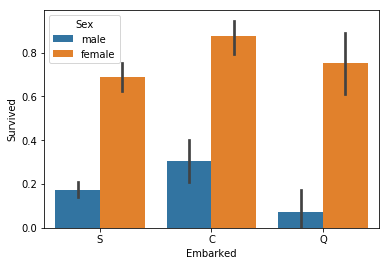

In [43]:
seaborn.barplot(x='Embarked', y='Survived', hue='Sex', data=train_data_frame);

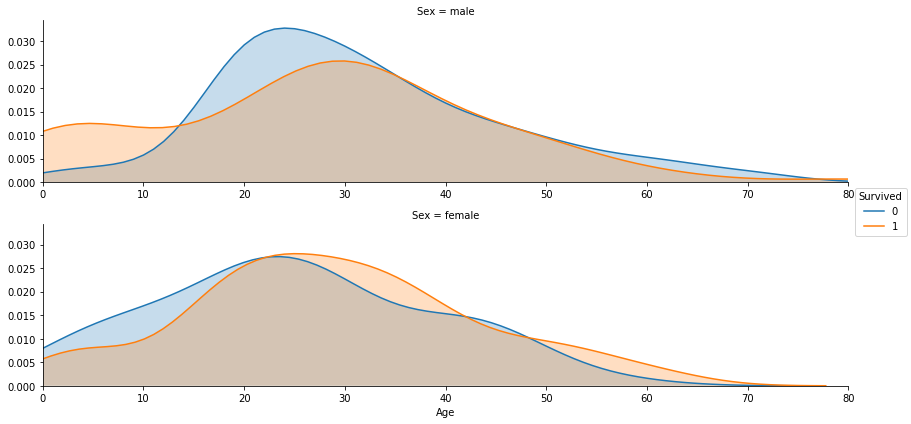

In [44]:
# Analyze correlation between Age and Survival
age_chart = seaborn.FacetGrid(train_data_frame, hue='Survived', row='Sex', aspect=4)
age_chart.map(seaborn.kdeplot, 'Age', shade=True)
age_chart.set(xlim=(0, train_data_frame['Age'].max()))
age_chart.add_legend()

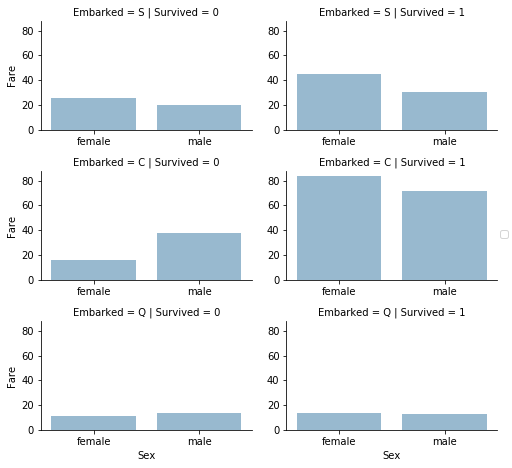

In [45]:
# Analyze correlation between Fare, Sex, Embarked and Survival
fare_chart = seaborn.FacetGrid(train_data_frame, row='Embarked', col='Survived', size=2.2, aspect=1.6)
fare_chart.map(seaborn.barplot, 'Sex', 'Fare', alpha=.5, ci=None, order=['female', 'male'])
fare_chart.add_legend()

In [46]:
# Convert Sex column to categorical feature
for dataset in combined_data_frame:
    dataset['Sex'] = dataset['Sex'].map({'female': 1, 'male': 0}).astype(int)

In [47]:
def complete_age_values():
    guess_ages = numpy.zeros((2, 3))

    for dataset in combined_data_frame:
        for i in range(0, 2):
            for j in range(0, 3):
                guess_data_frame = dataset[(dataset['Sex'] == i) & \
                                            (dataset['Pclass'] == j + 1)]['Age'].dropna()

                age_guess = guess_data_frame.median()

                # Convert random age float to nearest .5 age
                guess_ages[i, j] = int( age_guess / 0.5 + 0.5 ) * 0.5

        for i in range(0, 2):
            for j in range(0, 3):
                dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1), \
                        'Age' ] = guess_ages[i, j]

    dataset['Age'] = dataset['Age'].astype(int)

complete_age_values()

def categorize_ages():
    for dataset in combined_data_frame:
        dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
        dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
        dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
        dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
        dataset.loc[ dataset['Age'] > 64, 'Age']
        dataset['Age'] = dataset['Age'].astype(int)

categorize_ages()

In [48]:
# Check the new categorized data
train_data_frame.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,NaN,S


In [49]:
# Generate new feature to categorize SibSp and Parch
for dataset in combined_data_frame:
    dataset['IsAlone'] = 0
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

In [50]:
# Analyze the correlation between the new feature and Survival
alone_grouping = train_data_frame[['IsAlone', 'Survived']] \
    .groupby(['IsAlone'], as_index=False) \
    .mean() \
    .sort_values(by='Survived', ascending=True)

alone_grouping

,IsAlone,Survived
1,1,0.303538
0,0,0.505650


In [51]:
# Fill the missing values for the Embarked feature with the most frequent value
most_frequent_embark = train_data_frame['Embarked'].dropna().mode()[0]

for dataset in combined_data_frame:
    dataset['Embarked'] = dataset['Embarked'].fillna(most_frequent_embark)
    dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

train_data_frame.describe(include=['O'])

,Name,Ticket,Cabin
count,891,891,204
unique,891,681,147
top,"Daly, Mr. Eugene Patrick",347082,C23 C25 C27
freq,1,7,4


In [52]:
# Fill the missing value on the test data for the Fare feature with the average fare price
average_fare = test_data_frame['Fare'].dropna().median()
test_data_frame['Fare'].fillna(average_fare, inplace=True)

test_data_frame.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,IsAlone,FamilySize
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,0.363636,1.643541,0.447368,0.392344,35.576535,0.464115,0.605263,1.839713
std,120.810458,0.841838,0.481622,4.916055,0.896760,0.981429,55.850103,0.685516,0.489380,1.519072
min,892.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,996.250000,1.000000,0.000000,1.000000,0.000000,0.000000,7.895800,0.000000,0.000000,1.000000
50%,1100.500000,3.000000,0.000000,1.000000,0.000000,0.000000,14.454200,0.000000,1.000000,1.000000
75%,1204.750000,3.000000,1.000000,2.000000,1.000000,0.000000,31.471875,1.000000,1.000000,2.000000
max,1309.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,2.000000,1.000000,11.000000


In [53]:
def get_fare_categories():
    for dataset in combined_data_frame:
        dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
        dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
        dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
        dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
        dataset['Fare'] = dataset['Fare'].astype(int)

get_fare_categories()

In [54]:
# Check again for the new categorized data
train_data_frame.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsAlone,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,0,NaN,0,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,3,C85,1,0,2
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,1,NaN,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,3,C123,0,0,2
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,1,NaN,0,1,1


In [55]:
# Cleaning features no longer in use:
# Ticket column (high duplication rate),
# Cabin column (highly incomplete)
# PassengerId column (does not make any contribution)
# Name column (this is non-standard and may cause overfitting)
# SibSp, Parch and FamilSize columns (converted to new feature IsAlone)
def clean_data_frames():
    train_data_frame.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'FamilySize'], axis=1, inplace=True)
    test_data_frame.drop(['Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'FamilySize'], axis=1, inplace=True)
    combined_data_frame = [train_data_frame, test_data_frame]

clean_data_frames()

train_data_frame.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,0,3,0,1,0,0,0
1,1,1,1,2,3,1,0
2,1,3,1,1,1,0,1
3,1,1,1,2,3,0,0
4,0,3,0,2,1,0,1


In [56]:
# Prepare train and test data
x_train = train_data_frame.drop('Survived', axis=1)
y_train = train_data_frame['Survived']
x_test = test_data_frame.drop('PassengerId', axis=1).copy()

shuffle_split = ShuffleSplit(n_splits=20, test_size=.20, random_state=0)

In [57]:
def test_classifier(classifier):
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    score = cross_val_score(classifier, x_train, y_train, cv=shuffle_split)

    print("Accuracy: %.2f%% (+/- %.2f%%)" % (score.mean() * 100, score.std() * 100))

    return y_pred

def save_results(prediction, filename):
    results = pandas.DataFrame({
        'PassengerId': test_data_frame['PassengerId'],
        'Survived': prediction
    })
    results.to_csv(filename, index=False)

In [58]:
# Apply prediction using the classifiers
prediction_lr = test_classifier(LogisticRegression())
prediction_dt = test_classifier(DecisionTreeClassifier(max_depth=10))
prediction_rf = test_classifier(RandomForestClassifier(n_estimators=100))

Accuracy: 79.55% (+/- 2.49%)
Accuracy: 81.45% (+/- 3.57%)
Accuracy: 82.04% (+/- 2.95%)


In [59]:
# Save the predictions to a file
save_results(prediction_lr, 'results-lr.csv')
save_results(prediction_dt, 'results-dt.csv')
save_results(prediction_rf, 'results-rf.csv')

In [60]:
results_lr = pandas.read_csv('results-lr.csv')
results_dt = pandas.read_csv('results-dt.csv')
results_rf = pandas.read_csv('results-rf.csv')

In [61]:
results_lr.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [62]:
results_dt.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [63]:
results_rf.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
